# Installation Guide

# Each Step in Bioprocess

## 1. Create BioPocess object

### ___BioProcess___ Class
Store bioprocess data.

Parameters
----------
    experiment_info : pandas.DataFrame
        pandas dataframe of the experiment information.
    measured_data : pandas.DataFrame
        padas dataframe of the measured data.

In [1]:
import pandas as pd

from CCDPApy.BioProcess.BioProcess import BioProcess
from CCDPApy.helper_func.helper_func import input_path
from CCDPApy.pre_process.pre_process import pre_process
from CCDPApy.in_process.in_process import cumulative_calc
from CCDPApy.post_process.two_point_calc.twopt_calc import twopt_calc
from CCDPApy.post_process.polynomial_regression.polynomial_regression import polyreg_calc
from CCDPApy.post_process.rolling_regression.rolling_regression import rolling_regression

input_file = 'VS_NIIMBL VS-001.xlsx'
measurement_sheet = 'Glutamine'

# Get File Path
file_path = input_path(file_name=input_file)
# Read Measured Data
measured_data = pd.read_excel(io=file_path, sheet_name=measurement_sheet, header=5)
# Read Experiment Info
exp_info = pd.read_excel(io=file_path, sheet_name=measurement_sheet, nrows=4, usecols=[0, 1], header=None, index_col=0)
print(f'{input_file} imported.')

# Bio Process Class
bioprocess = BioProcess(experiment_info=exp_info,
                        measured_data=measured_data)

# Check Spcies list to analze
#if (kwargs.get('spc_list')):
#    spc_list = [name.upper() for name in kwargs.get('spc_list')] # Set AA List
#    bioprocess.set_spc_list(spc_list=spc_list)

# Check New Species List to Add
#if (kwargs.get('add_spc')):
#    bioprocess.set_new_spc(new_spc_list=kwargs.get('add_spc')) # add new species to spc_list'''

VS_NIIMBL VS-001.xlsx imported.


### Example

In [2]:
bioprocess.disp_experiment()


************ Experiment Information ************
Cell Line:              GS CHOZN Clone 23
Experiment ID:          NIIMBL VS-001
Experimenter Name:      Irfan Hodzic/Meghan McCann
Initial Culture Volume: 74 (mL)
Metabolite List:
['Alanine', 'Arginine', 'Asparagine', 'Aspartate', 'Cystine', 'Glucose', 'Glutamine', 'Glutamate', 'Glycine', 'Histidine', 'Isoleucine', 'Lactate', 'Leucine', 'Lysine', 'Methionine', 'NH3', 'Phenylalanine', 'Proline', 'Serine', 'Threonine', 'Tryptophan', 'Tyrosine', 'Valine', 'Ethanolamine']


## 2. Pre Process

### ___pre_process___ function<br>
Calculate run time(days), run time (hrs), culture volume before sampling (mL), and culture volume after sampling (mL). <br>

Parameters:
----------
    bio_process : BioProcess object
    feed_name : str
        spcies name of feed added during the experiment.<br>
        must be the same name of the measured data in the Excel File. 

In [3]:
measurement_sheet = 'Glutamine'
pre_process(bio_process=bioprocess, feed_name=measurement_sheet)

### Examples

In [4]:
bioprocess.disp_pre_process()

************ Pre Process Data ************
    RUN TIME (DAYS)  RUN TIME (HOURS)  VOLUME BEFORE SAMPLING (mL)  \
0          0.000000          0.000000                    74.000000   
1          0.995139         23.883333                    73.000000   
2          1.606250         38.550000                    71.500000   
3          1.982639         47.583333                    70.000000   
4          2.610417         62.650000                    68.500000   
5          2.989583         71.750000                    67.000000   
6          3.980556         95.533333                    67.137500   
7          5.045833        121.100000                    67.934813   
8          5.993056        143.833333                    59.962531   
9          6.975000        167.400000                    60.508720   
10         8.000000        192.000000                    61.074025   
11         8.985417        215.650000                    61.659116   
12         9.727778        233.466667          

## 3. In Process

### ___cumulative_calc___ function<br>
Calculate cumulative consumptions/productions for species.<br>

Parameters:
----------
    bio_process : BioProcess object
    feed_name : str
        spcies name of feed added during the experiment.<br>
        must be the same name of the measured data in the Excel File.
    use_feed_conc : bool, default=False, optional 
        must be True if feed concentrations are to be used to calculate cumulative consumptions/productions.
    use_conc_after_feed : bool, default=False, optional
        must be True if concentrations after feeding are to be used to calculate cumulative consumptions/productions.


In [5]:
measurement_sheet = 'Glutamine'
cumulative_calc(bio_process=bioprocess,
                feed_name=measurement_sheet,
                use_feed_conc=True,
                use_conc_after_feed=False)

### Examples

##### Disp

In [6]:
bioprocess.disp_data(spc='cell', process='inpro')
bioprocess.disp_data(spc='oxygen', process='inpro')
bioprocess.disp_data(spc='product', process='inpro')
bioprocess.disp_data(spc='metabolite', process='inpro')


************ Cell In Process Data ************
    INTEGRAL OF VIABLE CELL CONC. IVCC (x106 cells hr/mL)  \
0                                            0.000000       
1                                            9.410033       
2                                           20.278033       
3                                           30.982533       
4                                           65.183867       
5                                           99.286117       
6                                          264.877575       
7                                          593.920575       
8                                          991.753908       
9                                         1452.482242       
10                                        1932.182242       
11                                        2364.977242       
12                                        2650.934742       

    CUM CELLS PROD. (x106 cells)  
0                       0.000000  
1                      21.6

##### Plot

['CELL']
{'concentration': True, 'cumulative': False, 'sp_rate': False}
{'twopt': False, 'polyreg': False, 'rollreg': False}


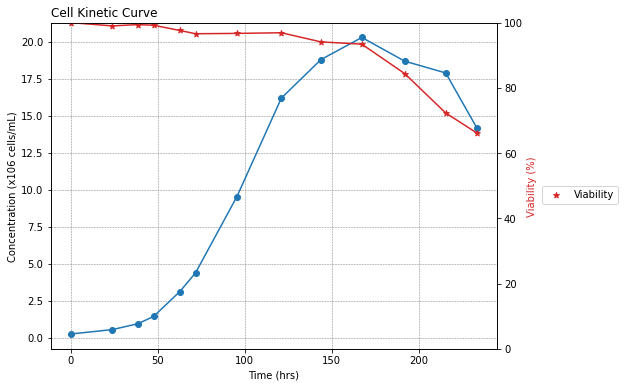

In [7]:
plot_list = 'cell'
profile = 'conc'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, viability=True)

['GLUCOSE', 'GLUTAMINE']
{'concentration': True, 'cumulative': True, 'sp_rate': False}
{'twopt': False, 'polyreg': False, 'rollreg': False}


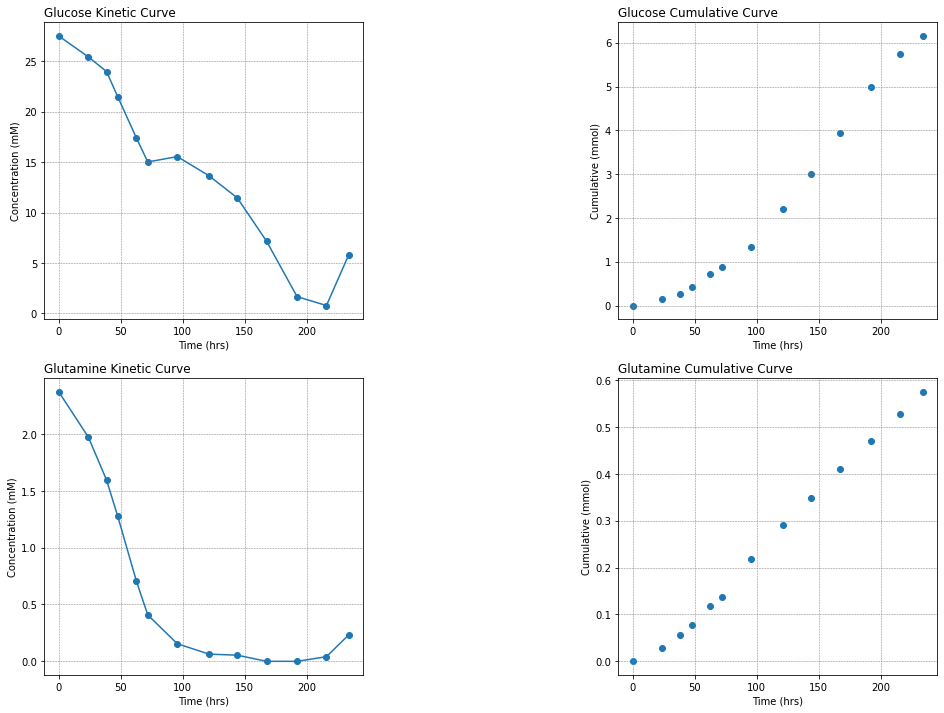

In [8]:
plot_list = ['glucose', 'glutamine']
profile = ['conc', 'cumulative']

fig = bioprocess.plot(spc_list=plot_list,
                      profile=profile,
                      #combined=True,
                      )

['GLUCOSE', 'GLUTAMINE']
{'concentration': True, 'cumulative': True, 'sp_rate': False}
{'twopt': False, 'polyreg': False, 'rollreg': False}


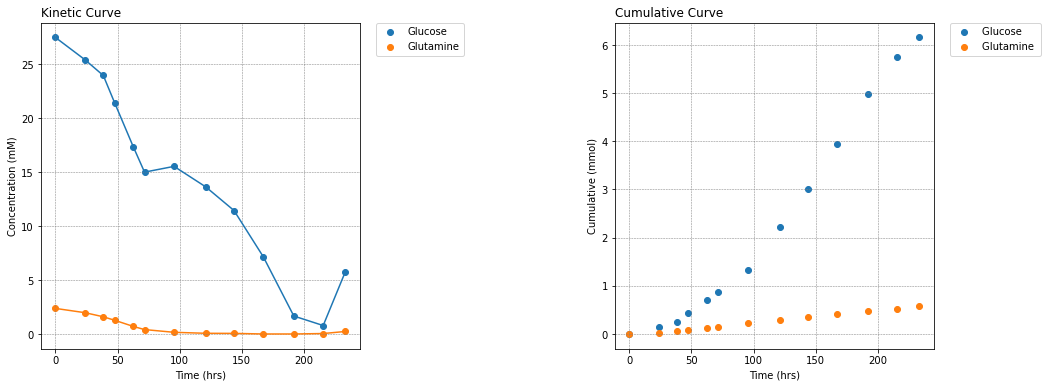

In [9]:
plot_list = ['glucose', 'glutamine']
profile = ['conc', 'cumulative']

fig = bioprocess.plot(spc_list=plot_list,
                      profile=profile,
                      combined=True,
                      )

## 4. Post Process

### 4.1 Two-Point Calculations

#### ___twopt_calc___ function<br>
Calculate SP. rate for species using Two-Point Calculation.<br>

Parameters:
----------
    bio_process : BioProcess object

In [10]:
twopt_calc(bio_process=bioprocess)

#### Examples

##### Disp

In [11]:
bioprocess.disp_data(spc='cell', process='twopt')
bioprocess.disp_data(spc='oxygen', process='twopt')
bioprocess.disp_data(spc='igg', process='twopt')
bioprocess.disp_data(spc='metabolite', process='twopt')


************ Cell Post Process Data -Two Point Calc. ************
    SP. GROWTH RATE, m (hr-1) [mv-kd]        mv        kd
0                                 NaN       NaN       NaN
1                            0.031456  0.032038  0.000582
2                            0.036621  0.036640  0.000018
3                            0.045775  0.046322  0.000547
4                            0.049121  0.051020  0.001899
5                            0.037388  0.039671  0.002283
6                            0.032023  0.033088  0.001065
7                            0.021490  0.022117  0.000627
8                            0.008038  0.009770  0.001731
9                            0.004712  0.005364  0.000652
10                          -0.001938  0.002455  0.004393
11                          -0.000394  0.007878  0.008273
12                          -0.011030 -0.008806  0.002224

************ Oxygen Post Process Data -Two Point Calc. ************
    SP. OUR (mmol/109 cells/hr)  SP. OXYGEN CONSUMPT

##### Plot

['GLUCOSE', 'GLUTAMINE']
{'concentration': False, 'cumulative': False, 'sp_rate': True}
{'twopt': True, 'polyreg': False, 'rollreg': False}


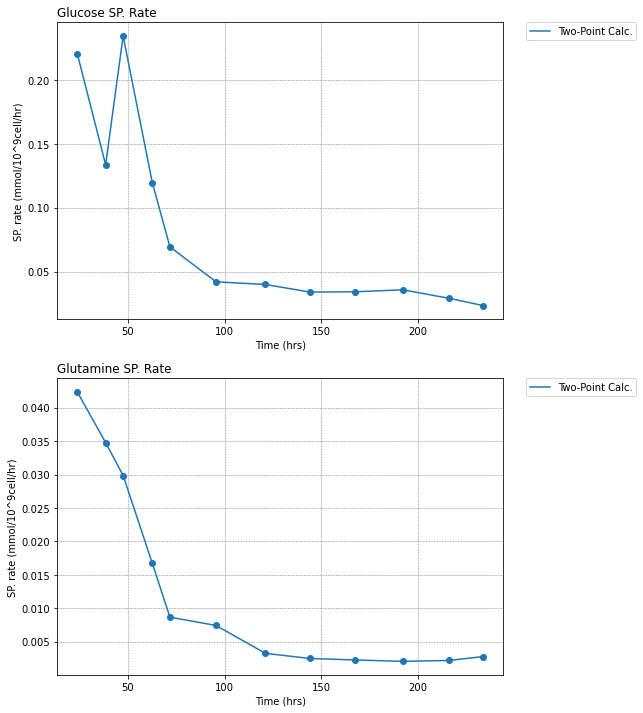

In [12]:
plot_list = ['glucose', 'glutamine']
profile = 'sp rate'
method = 'twopt'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, method=method)

['GLUCOSE', 'GLUTAMINE']
{'concentration': False, 'cumulative': False, 'sp_rate': True}
{'twopt': True, 'polyreg': False, 'rollreg': False}


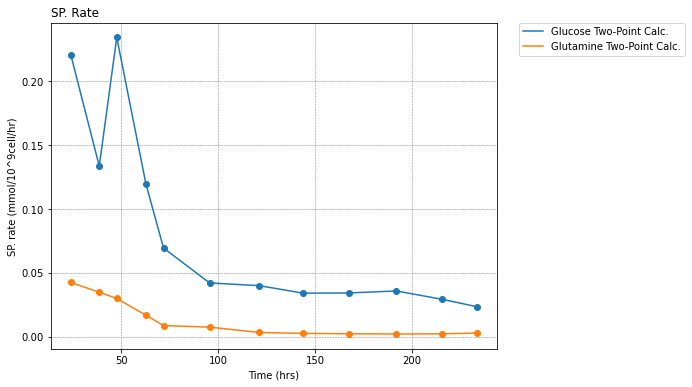

In [13]:
plot_list = ['glucose', 'glutamine']
profile = 'sp rate'
method = 'twopt'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, method=method, combined=True)

['GLUCOSE', 'GLUTAMINE']
{'concentration': True, 'cumulative': True, 'sp_rate': True}
{'twopt': True, 'polyreg': False, 'rollreg': False}


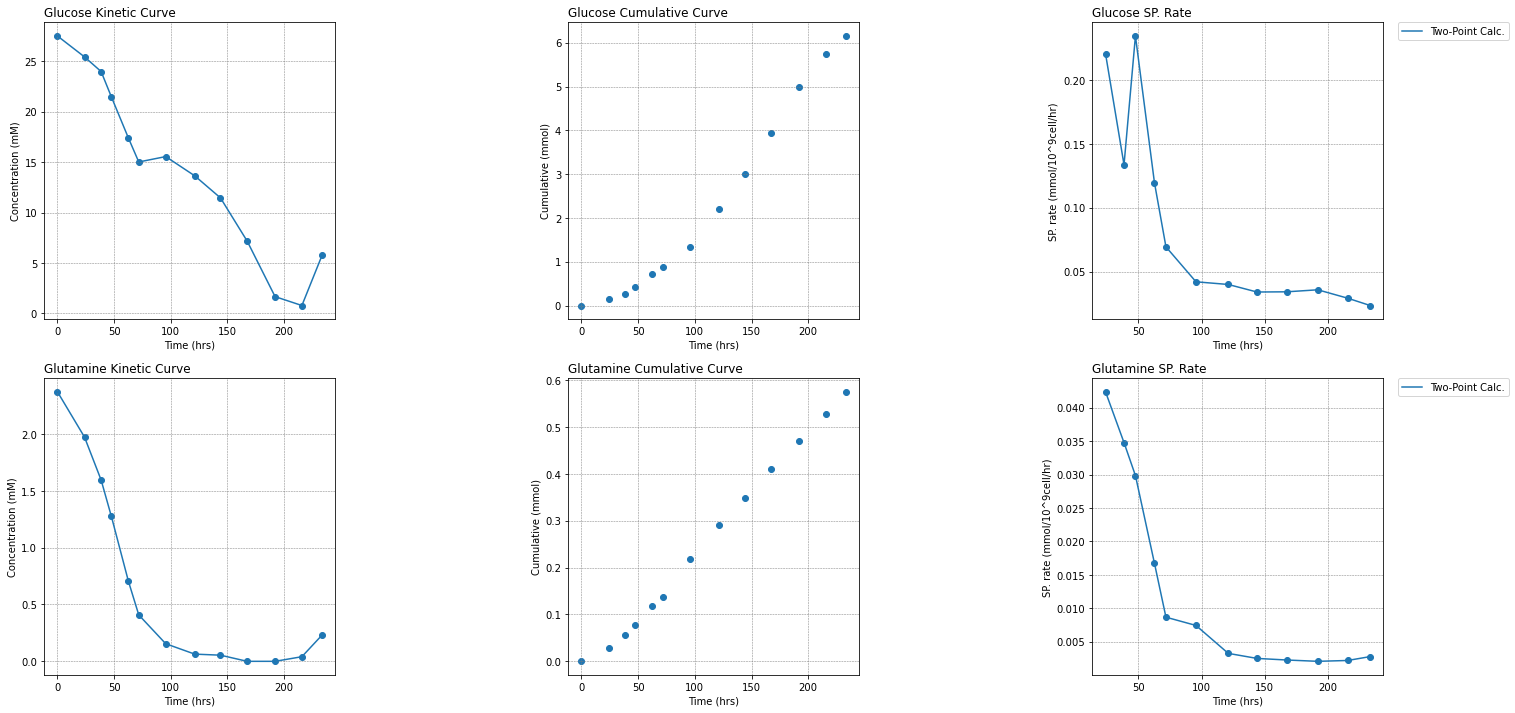

In [14]:
plot_list = ['glucose', 'glutamine']
profile = 'all'
method = 'twopt'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, method=method)

### 4.2 Polynomial Regression

#### ___polyreg_calc___ function<br>
Calculate SP. rate for species using Polynomial Regression.<br>

Parameters:
----------
    bio_process : BioProcess object
    polyorder_file : str, default=None, optional
        an Excel file of polynomial orders for species.<br>
        if this argument is None, the order of 3 is to be used for all species.

In [15]:
poly_file = 'polynomial_order_1.xlsx'
polyreg_calc(bio_process=bioprocess, polyorder_file=poly_file)

#### Examples

##### Disp

In [16]:
bioprocess.disp_data(spc='cell', process='polyreg')
bioprocess.disp_data(spc='oxygen', process='polyreg')
bioprocess.disp_data(spc='igg', process='polyreg')
bioprocess.disp_data(spc='metabolite', process='polyreg')


************ Post Process Data -Poly. Reg. ************
    Poly. Reg. CUM CELLS PROD. (x106 cells)
0                                  0.753748
1                                -24.704889
2                                 40.882340
3                                105.991352
4                                248.153364
5                                350.016669
6                                650.902104
7                                986.530617
8                               1248.627165
9                               1437.717853
10                              1495.565950
11                              1368.202514
12                              1124.840964

************ Post Process Data -Poly. Reg. ************
    Poly. Reg. CUM OXYGEN CONS. (mmol)  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
5                 

##### Plot

['GLUCOSE', 'GLUTAMINE']
{'concentration': False, 'cumulative': False, 'sp_rate': True}
{'twopt': False, 'polyreg': True, 'rollreg': False}


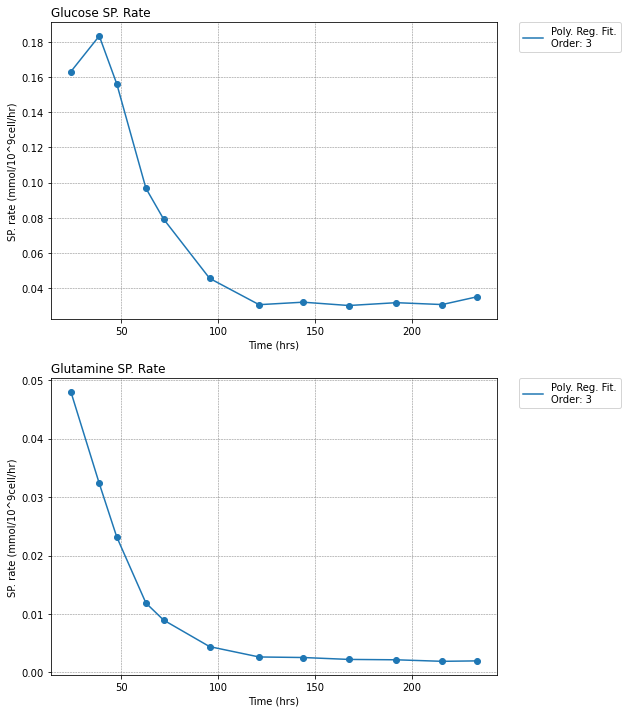

In [17]:
plot_list = ['glucose', 'glutamine']
profile = 'sp rate'
method = 'polyreg'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, method=method)

['GLUCOSE', 'GLUTAMINE']
{'concentration': False, 'cumulative': True, 'sp_rate': True}
{'twopt': True, 'polyreg': True, 'rollreg': True}


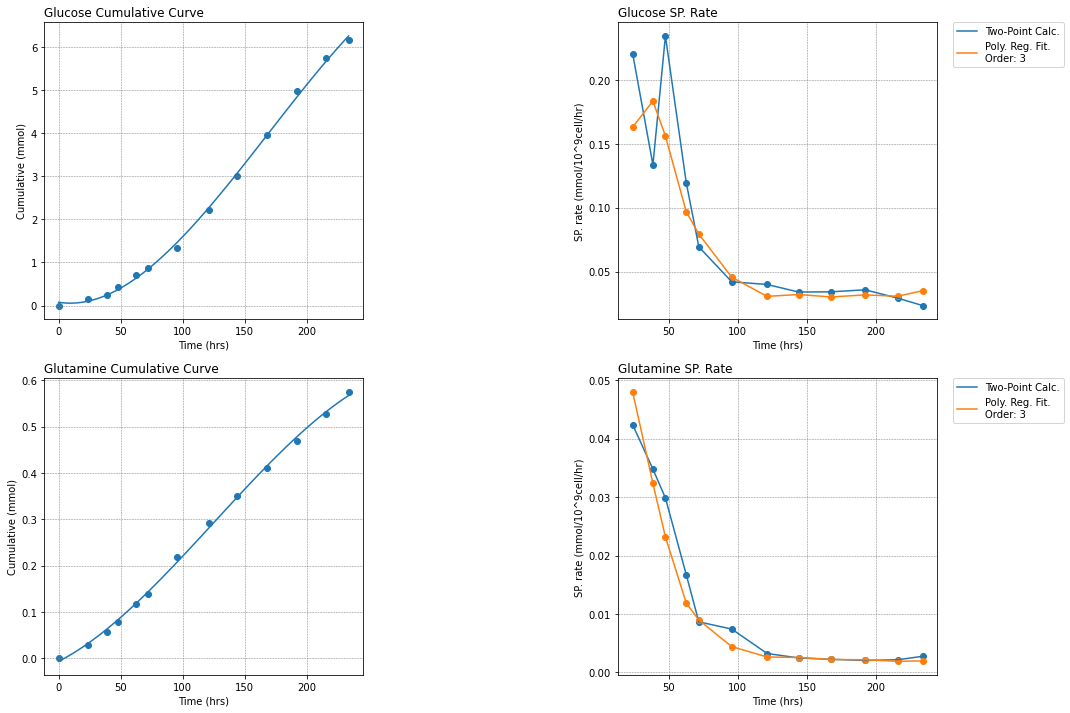

In [18]:
plot_list = ['glucose', 'glutamine']
profile = ['sp rate', 'cumulative']
method = 'all'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, method=method)

['GLUCOSE', 'GLUTAMINE']
{'concentration': True, 'cumulative': True, 'sp_rate': True}
{'twopt': True, 'polyreg': True, 'rollreg': True}


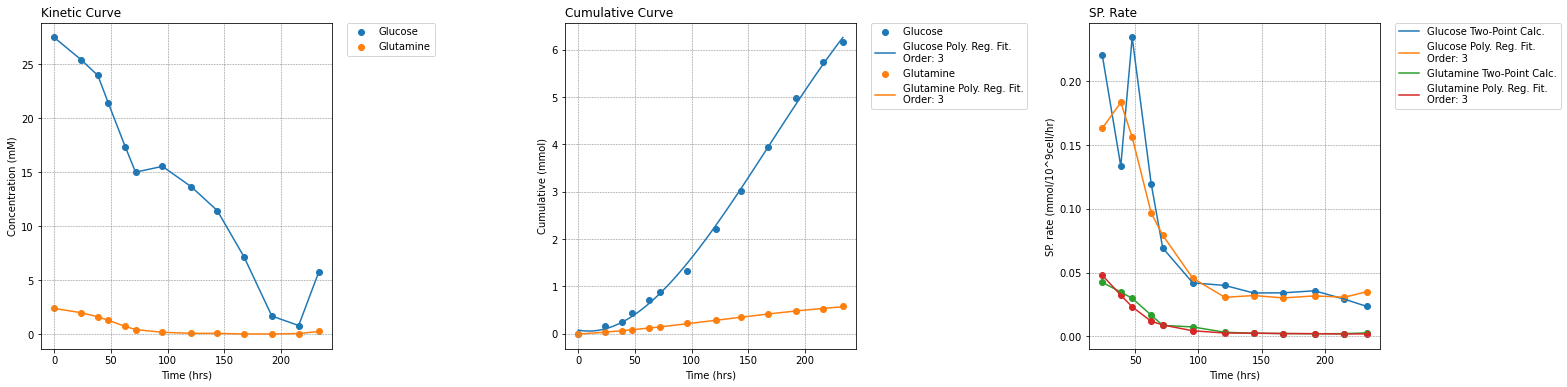

In [19]:
plot_list = ['glucose', 'glutamine']
profile = 'all'
method = 'all'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, method=method, combined=True)

### 4.3 Rolling Polynomial Regression

#### ___rolling_regression___ function<br>
Calculate SP. rate for species using Rolling Polynomial Regression.<br>

Parameters:
----------
    bio_process : BioProcess object
    order : int, default=3, optional
        polynomial order for the rolling polynomial regression.
    windows : int, default=6, optional
        data point size that is to be used for the regression.


In [20]:
rolling_regression(bio_process=bioprocess, order=3, windows=6)

#### Examples

##### Disp

In [21]:
bioprocess.disp_data(spc='cell', process='rollreg')
bioprocess.disp_data(spc='oxygen', process='rollreg')
bioprocess.disp_data(spc='igg', process='rollreg')
bioprocess.disp_data(spc='metabolite', process='rollreg')

rollreg Not Yet Done.
In Process Not Yet Done.
In Process Not Yet Done.
************ Metabolite Post Process Data -Roll. Poly. Reg. ************
    ALA RUN TIME (HOURS)  Conc. ALA MID. (mM)  \
0              11.941667             0.136208   
1              31.216667             0.254239   
2              43.066667             0.370505   
3              55.116667             0.566694   
4              67.200000             0.833259   
5              83.641667             1.525522   
6             108.316667             3.496531   
7             132.466667             6.513376   
8             155.616667             8.320903   
9             179.700000             8.092900   
10            203.825000             7.341677   
11            224.558333             6.953078   

   Roll. Poly. Reg. Order: 3 Window: 6 qAlanine (mmol/109 cell/hr)      rAla  \
0                                           -0.012017              -7.510368   
1                                           -0.010518    

##### Plot

['GLUCOSE', 'GLUTAMINE']
{'concentration': False, 'cumulative': False, 'sp_rate': True}
{'twopt': False, 'polyreg': False, 'rollreg': True}


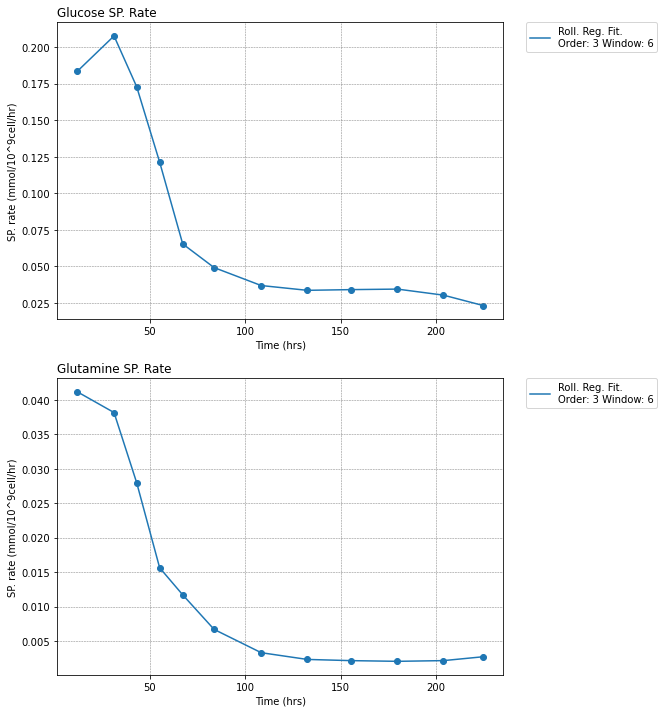

In [22]:
plot_list = ['glucose', 'glutamine']
profile = 'sp rate'
method = 'rollreg'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, method=method)

['GLUCOSE', 'GLUTAMINE']
{'concentration': True, 'cumulative': False, 'sp_rate': True}
{'twopt': True, 'polyreg': True, 'rollreg': True}


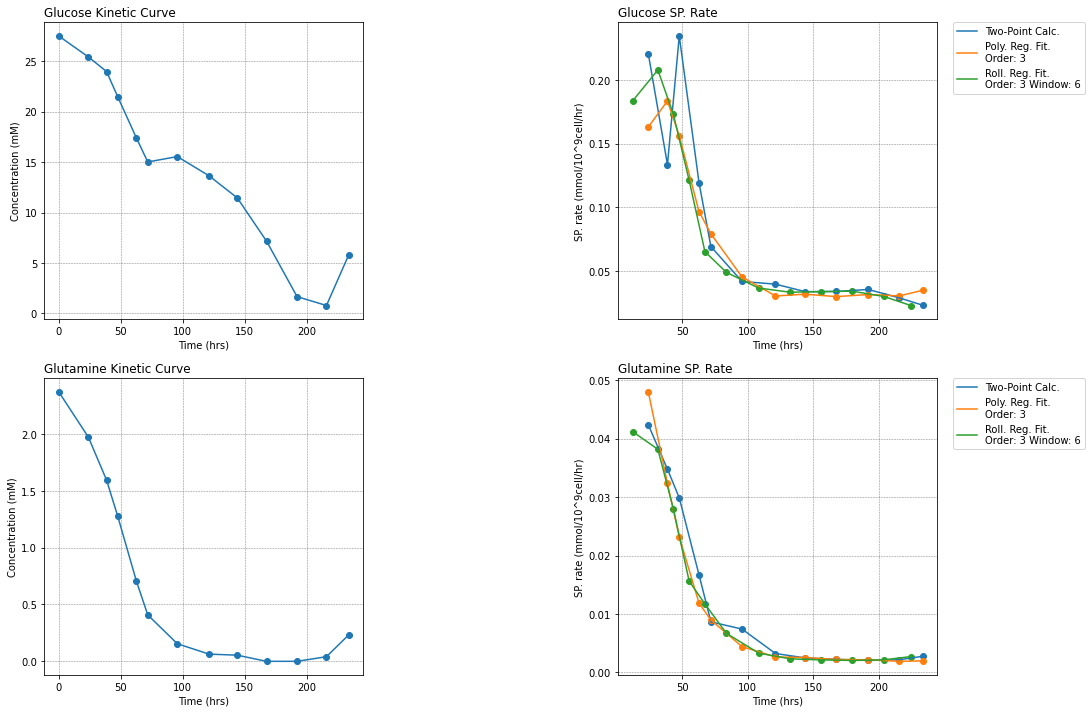

In [23]:
plot_list = ['glucose', 'glutamine']
profile = ['sp rate', 'conc']
method = 'all'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, method=method)

['GLUCOSE', 'GLUTAMINE']
{'concentration': True, 'cumulative': True, 'sp_rate': True}
{'twopt': True, 'polyreg': True, 'rollreg': True}


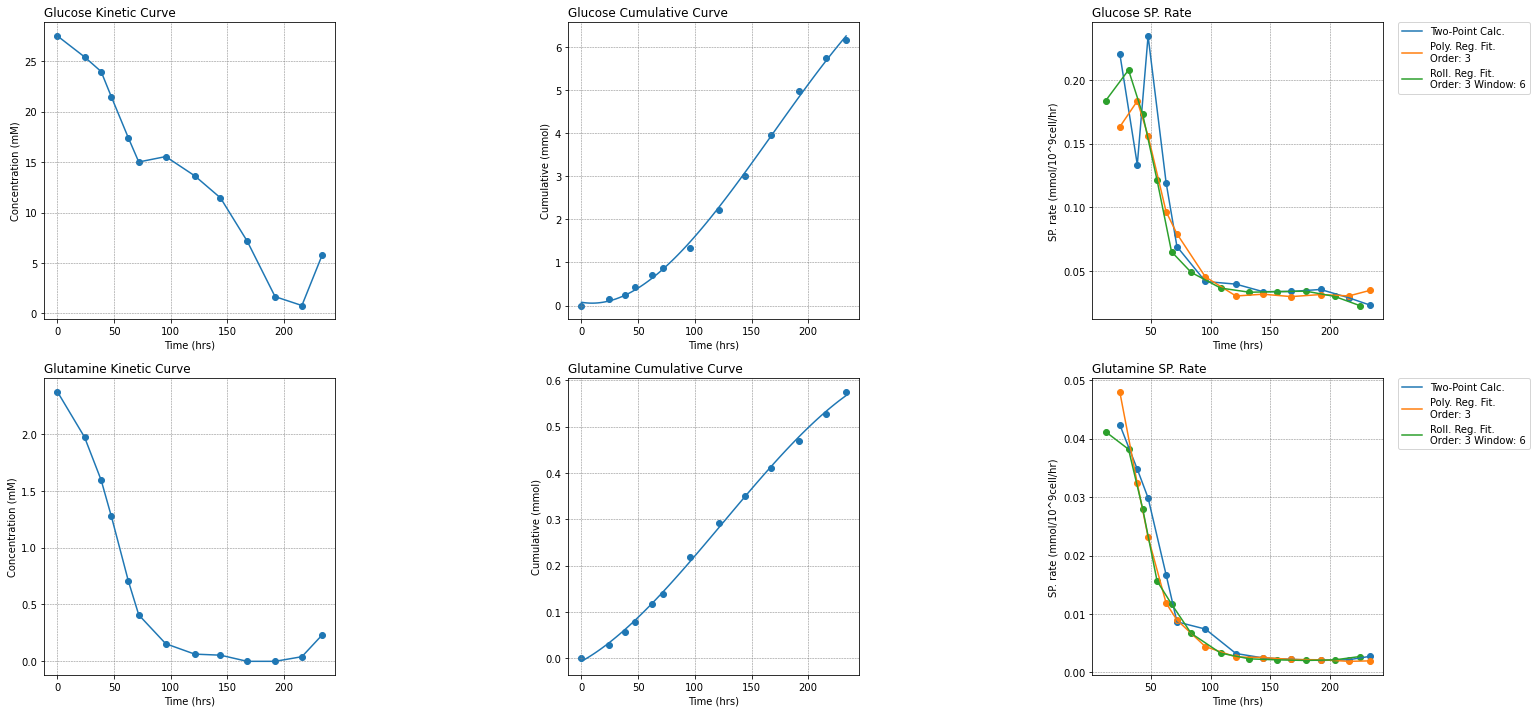

In [24]:
plot_list = ['glucose', 'glutamine']
profile = 'all'
method = 'all'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, method=method)

# ___bio_process___ function

Execute bioprocess steps; pre process, in process, post process.

Parameters
----------
    input_file : str
        an Excel file of the measured data.
    measurement_sheet : str
        the sheet name of the measured data Excel file.<br>
        must be the same as name of species feed added.<br>
        E.g. 'Glutamine', 'Glucose'

Returns
-------
    bio_process : python object
        Bioprocess object.

Other Parameters
----------------
**kwargs : bio_process properties, optional<br>
    Properties:<br>

    
    spc_list: list of str.
        List of species name to be analyzed.
        Upper, lower, or capitalized case can be uesd.
        If this is no list is passed, original species list is to be used.
        default=['Alanine', 'Arginine', 'Asparagine', 'Aspartate', 'Cystine','Glucose', 'Glutamine', 'Glutamate', 'Glycine', 'Histidine','Isoleucine', 'Lactate', 'Leucine','Lysine', 'Methonine', 'NH3','Phenylalanine', 'Proline', 'Serine', 'Threonine', 'Tryptophan','Tyrosine', 'Valine','Ethanolamine']

    add_spc: list of str.
        List of new species name to be analuzed, which is not listed in the original species list.

    use_feed_conc: bool, default=False
        True if the measured data has the measurements of feed concentrations. Otherwise, False.

    use_conc_after_feed: bool, default=False
        True if the measured data has the measurements of concentrations after feeding. Otherwiese, False.

    all_method: bool
        True if all regression methods are required.

    polyreg:  bool
        True if polynomial regression is needed.

    polyorder_file: string, default='polynomial_order.xlsx'.
        Name of the file, whihc includes species name and the polynomial order for each species.
        '.xlsx' must be included in the file name. The default polynomial order of 3 is to be used, if this is not specified.

    rollreg: bool
        True if rolling polynomial regression is needed.

    rollreg_order: int, default=3
        The polynomial order for the regression.

    rollreg_window: int, default=6
        The window size for the regression.


In [25]:
from CCDPApy import bio_process

input_file = 'VS_NIIMBL VS-001.xlsx'
measurement_sheet = 'Glutamine'
key = {'use_feed_conc': True,
       'use_conc_after_feed': False,
       'spc_list': ['Glucose', 'Lactate', 'Glutamine', 'Asparagine', 'Aspartate'],
       'polyreg': True, 'polyorder_file': 'polynomial_order_1.xlsx',
       'rollreg': True, 'rollreg_order': 3, 'rollreg_window': 6,
       }

bioprocess = bio_process(input_file=input_file,
                         measurement_sheet=measurement_sheet,
                         **key)

VS_NIIMBL VS-001.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.


# ___CellLine___ Class

Store BioProcess objects for data aggregation.

In [26]:
from CCDPApy import CellLine

cell_line = CellLine()
cell_line.add_bio_process(bio_process=bioprocess)

## Example

In [27]:
cell_line.disp_cell_lines()

Cell Line: GS CHOZN Clone 23
Experiment 1: NIIMBL VS-001




# Tutorial For Cell Line 1

Cell Line 1 has __3 differnet experiments__.<br>
Cell Line 1 has __feed concentrations__ but no measurements of __concentrations after feeding__.
__Glutamine__ feed is added in Cell Line 1.

In [28]:
from CCDPApy import CellLine    # used to aggregate all cell lines and experiments data
from CCDPApy import bio_process # used for data process of one experiment

data_file_1 = ['VS_NIIMBL VS-001.xlsx', 'VS_NIIMBL VS-002.xlsx', 'VS_NIIMBL VS-003.xlsx']
sheet_1 = 'Glutamine'
key_cl1 = {'use_feed_conc': True,
           'use_conc_after_feed': False,
           'spc_list': ['Glucose','Lactate','Glutamine','Asparagine','Aspartate'],
           'polyreg': True, 'polyorder_file': 'polynomial_order_1.xlsx',
           'rollreg': True, 'rollreg_order': 3, 'rollreg_window': 6,
           }

cell_line = CellLine()

for input in data_file_1:
    cl_1 = bio_process(input_file=input, measurement_sheet=sheet_1, **key_cl1)
    cell_line.add_bio_process(bio_process=cl_1)

VS_NIIMBL VS-001.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.
VS_NIIMBL VS-002.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.
VS_NIIMBL VS-003.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.


In [29]:
cell_line.disp_cell_lines()

Cell Line: GS CHOZN Clone 23
Experiment 1: NIIMBL VS-001
Experiment 2: NIIMBL VS-002
Experiment 3: NIIMBL VS-003




# Tutorial For Cell Line 2

Cell Line 2 has __3 experiments__.<br>
Cell Line 2 has measurements of __concentrations after feeding__ but does't have __feed concentraions__.<br>
__Glucose__ feed is added in Cell Line 2.

In [30]:
data_file_2 = ['GS_Sigma_FB01_B1.xlsx', 'GS_Sigma_FB01_B2.xlsx', 'GS_Sigma_FB01_B3.xlsx']
sheet_2 = 'Glucose'
key_cl2 = {'use_feed_conc': False,
           'use_conc_after_feed': True,
           'spc_list': ['Glucose','Lactate','Glutamine','Asparagine','Aspartate'],
           'polyreg': True, 'polyorder_file': 'polynomial_order_2.xlsx',
           'rollreg': True, 'rollreg_order': 3, 'rollreg_window': 6,
           }
for input in data_file_2:
    cl_2 = bio_process(input_file=input, measurement_sheet=sheet_2, **key_cl2)
    cell_line.add_bio_process(bio_process=cl_2)


GS_Sigma_FB01_B1.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.
GS_Sigma_FB01_B2.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.
GS_Sigma_FB01_B3.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.


In [31]:
cell_line.disp_cell_lines()

Cell Line: GS CHOZN Clone 23
Experiment 1: NIIMBL VS-001
Experiment 2: NIIMBL VS-002
Experiment 3: NIIMBL VS-003


Cell Line: GS Sigma CHOZN Clone 23
Experiment 1: NIIMBL-FB01-B1
Experiment 2: NIIMBL-FB01-B2
Experiment 3: NIIMBL-FB01-B3




# Tutorial For Cell Line 3

Cell Line 3 has __3 experiments__.<br>
Cell Line 3 doesn't have both measurements of __concentrations after feeding__ and __feed concentraions__.<br>
For __glucose__, Cell Line 3 has the __calculated cumulative profile__ in Measured Data.<br>
__Glutamine__ feed is added in Cell Line 3.

In [32]:
data_file_3 = ['Merck_XB50.xlsx', 'Merck_XB51.xlsx', 'Merck_XB52.xlsx']
sheet_3 = 'Glutamine'
key_cl3 = {'use_feed_conc': False,
           'use_conc_after_feed': False,
           'spc_list': ['Glucose','Lactate','Glutamine','Asparagine','Aspartate'],
           'all_method': True
           }

for input in data_file_3:
    cl_3 = bio_process(input_file=input, measurement_sheet=sheet_3, **key_cl3)
    cell_line.add_bio_process(bio_process=cl_3)

Merck_XB50.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.
Merck_XB51.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.
Merck_XB52.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.


In [33]:
cell_line.disp_cell_lines()

Cell Line: GS CHOZN Clone 23
Experiment 1: NIIMBL VS-001
Experiment 2: NIIMBL VS-002
Experiment 3: NIIMBL VS-003


Cell Line: GS Sigma CHOZN Clone 23
Experiment 1: NIIMBL-FB01-B1
Experiment 2: NIIMBL-FB01-B2
Experiment 3: NIIMBL-FB01-B3


Cell Line: Merck
Experiment 1: XB50
Experiment 2: XB51
Experiment 3: XB52




# Plotting

## One Experiment

### Each plot for each species

In [34]:
cell_line.get_cell_line_list()

['GS CHOZN Clone 23', 'GS Sigma CHOZN Clone 23', 'Merck']

['GLUCOSE', 'LACTATE', 'GLUTAMINE', 'ASPARAGINE', 'ASPARTATE']
{'concentration': True, 'cumulative': True, 'sp_rate': True}
{'twopt': True, 'polyreg': True, 'rollreg': True}


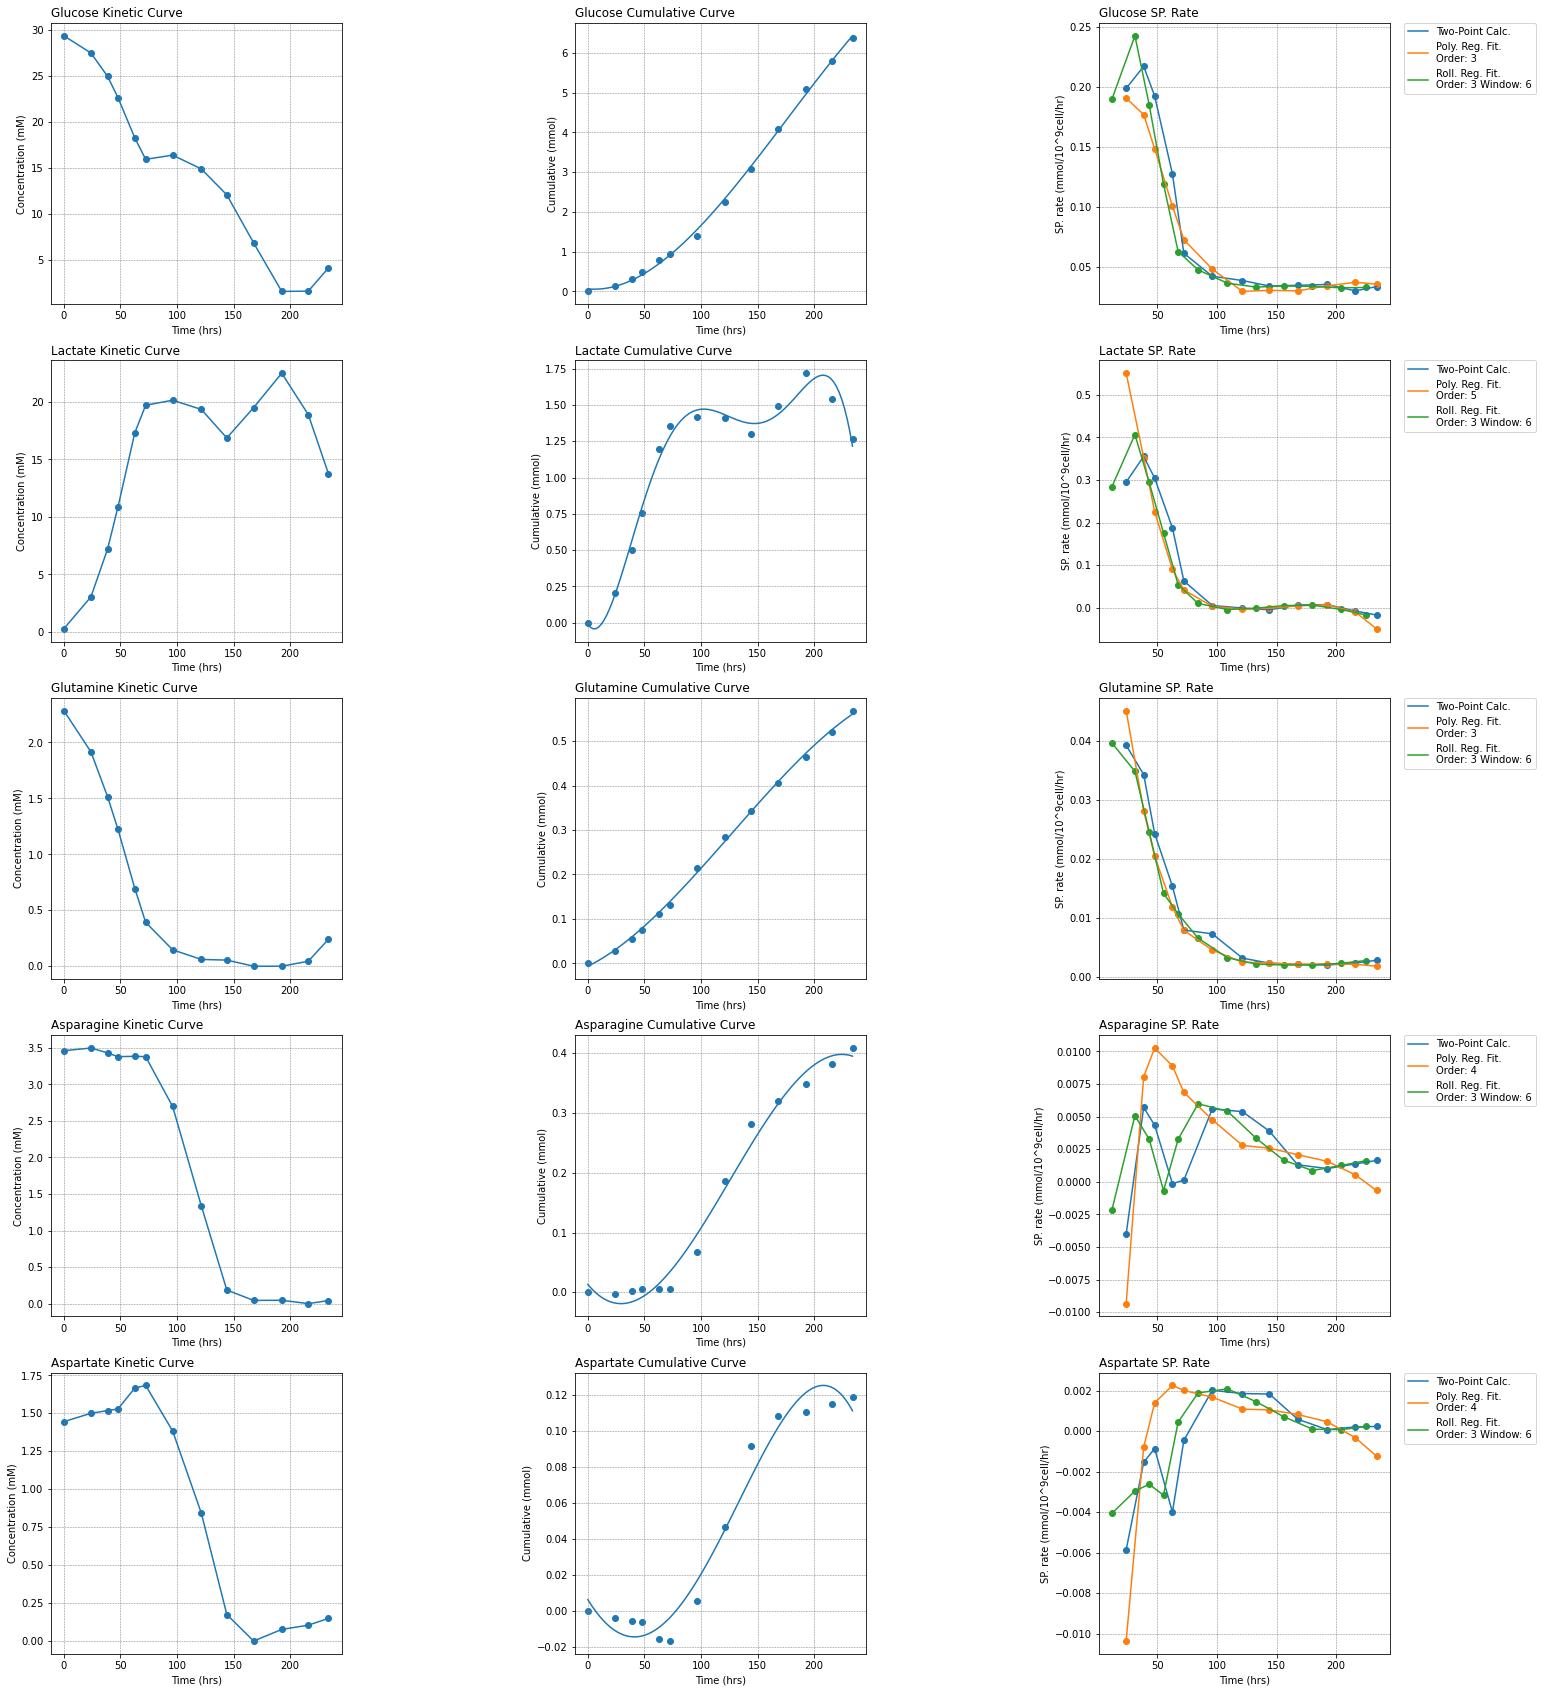

In [35]:
plot_list = ['Glucose','Lactate','Glutamine','Asparagine','Aspartate']
cl1_dict = cell_line.get_cell_line(cl_name='GS CHOZN Clone 23')
exp2 = cl1_dict['NIIMBL VS-002']
fig = exp2.plot(spc_list=plot_list, profile='all', method='all')

### Multiple species on the same plot

['GLUCOSE', 'LACTATE', 'GLUTAMINE', 'ASPARAGINE', 'ASPARTATE']
{'concentration': True, 'cumulative': True, 'sp_rate': True}
{'twopt': False, 'polyreg': True, 'rollreg': False}


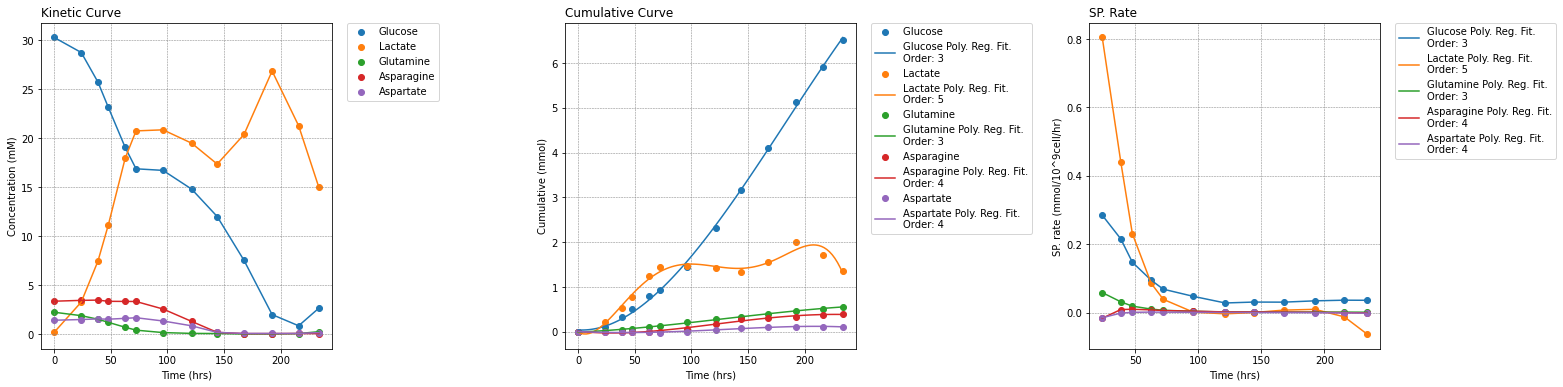

In [36]:
plot_list = ['Glucose','Lactate','Glutamine','Asparagine','Aspartate']
cl1_dict = cell_line.get_cell_line(cl_name='GS CHOZN Clone 23')
exp3 = cl1_dict['NIIMBL VS-003']
fig = exp3.plot(spc_list=plot_list, profile='all', method='polyreg', combined=True)

## Different Experiments in One Cell Line

In [37]:
cell_line.disp_cell_lines()

Cell Line: GS CHOZN Clone 23
Experiment 1: NIIMBL VS-001
Experiment 2: NIIMBL VS-002
Experiment 3: NIIMBL VS-003


Cell Line: GS Sigma CHOZN Clone 23
Experiment 1: NIIMBL-FB01-B1
Experiment 2: NIIMBL-FB01-B2
Experiment 3: NIIMBL-FB01-B3


Cell Line: Merck
Experiment 1: XB50
Experiment 2: XB51
Experiment 3: XB52




Makeing a plot for ['NIIMBL-FB01-B1', 'NIIMBL-FB01-B2', 'NIIMBL-FB01-B3']


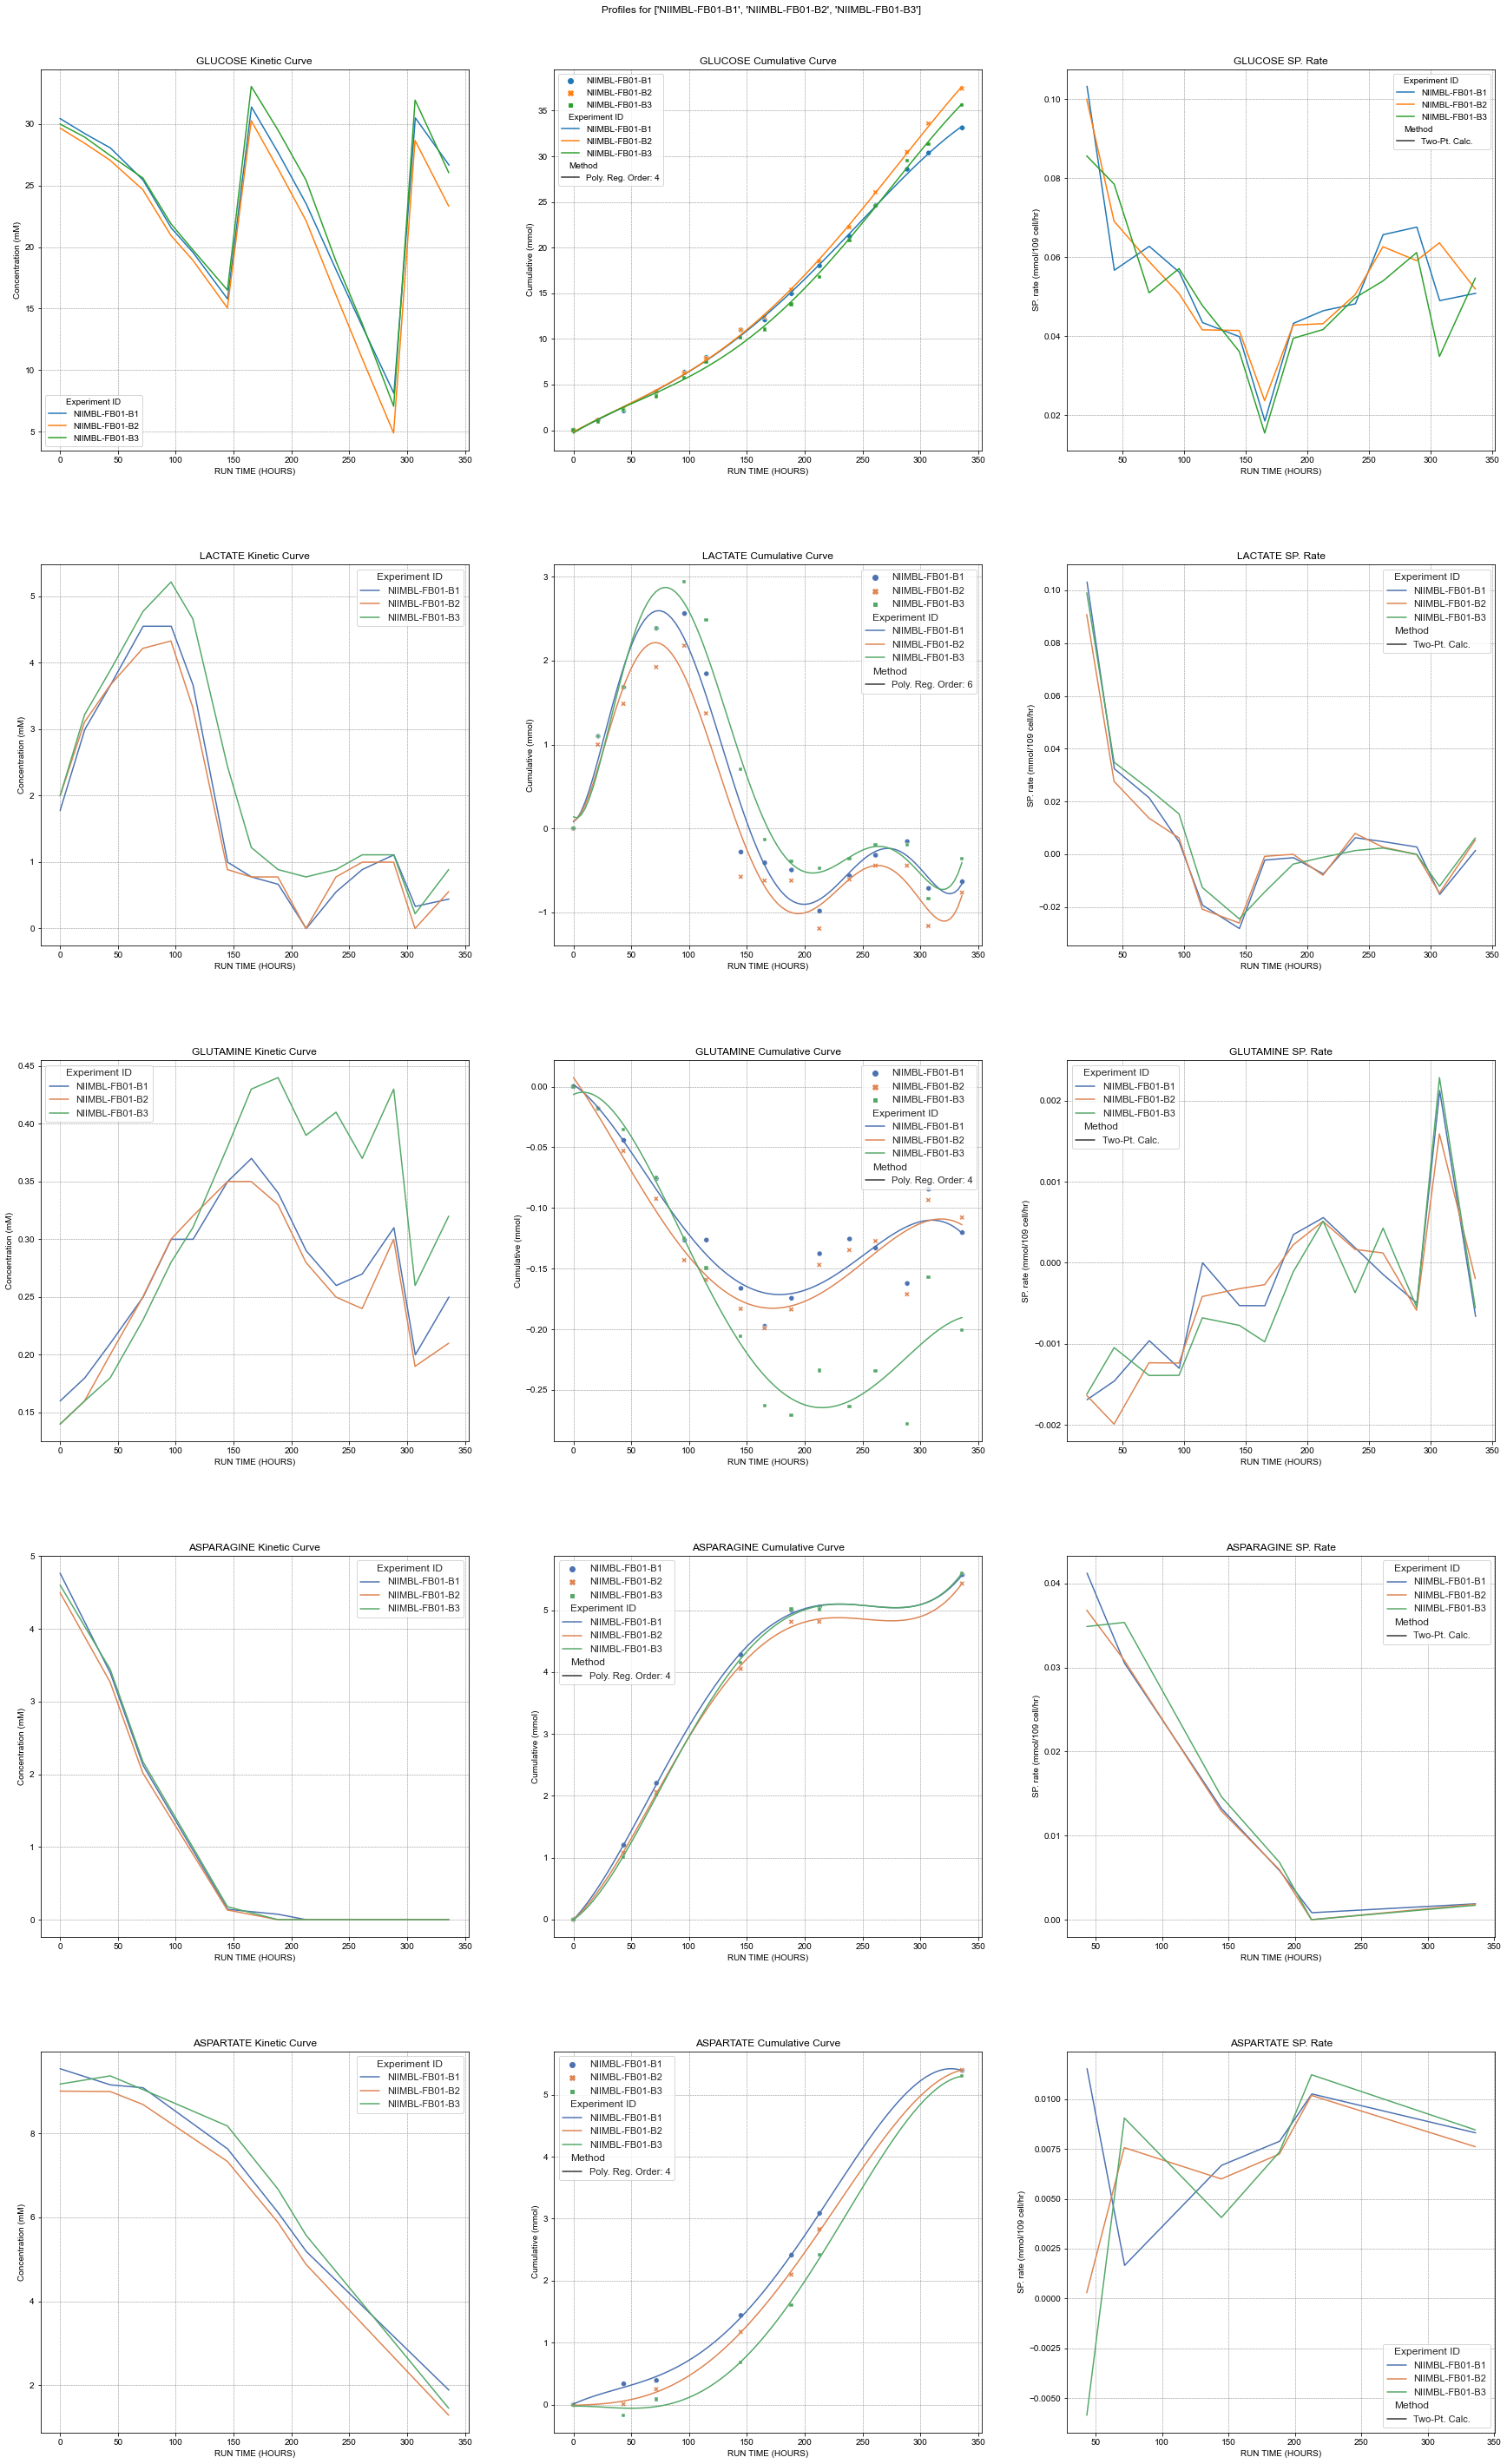

In [38]:
plot_list = plot_list = ['Glucose','Lactate','Glutamine','Asparagine','Aspartate']

method = 'twopt' # default='all', 'polyreg', 'twopt', 'rollreg' 
exp_lst = ['NIIMBL-FB01-B2', 'NIIMBL-FB01-B3']
file_name = 'GS_Sigma_CHOZN_Clone_23'

fig = cell_line.plot_exps(cell_line='GS Sigma CHOZN Clone 23',
                          spc_list=plot_list,
                          method=method,
                          #exp_list=exp_lst,
                          #file_name=file_name
                          )

# Data Aggregation

In [39]:
cell_line.disp_cell_lines()

Cell Line: GS CHOZN Clone 23
Experiment 1: NIIMBL VS-001
Experiment 2: NIIMBL VS-002
Experiment 3: NIIMBL VS-003


Cell Line: GS Sigma CHOZN Clone 23
Experiment 1: NIIMBL-FB01-B1
Experiment 2: NIIMBL-FB01-B2
Experiment 3: NIIMBL-FB01-B3


Cell Line: Merck
Experiment 1: XB50
Experiment 2: XB51
Experiment 3: XB52




## Different Cell Lines and Their Experiments

Compare Differend Cell Lines

['GS CHOZN Clone 23', 'GS Sigma CHOZN Clone 23', 'Merck']


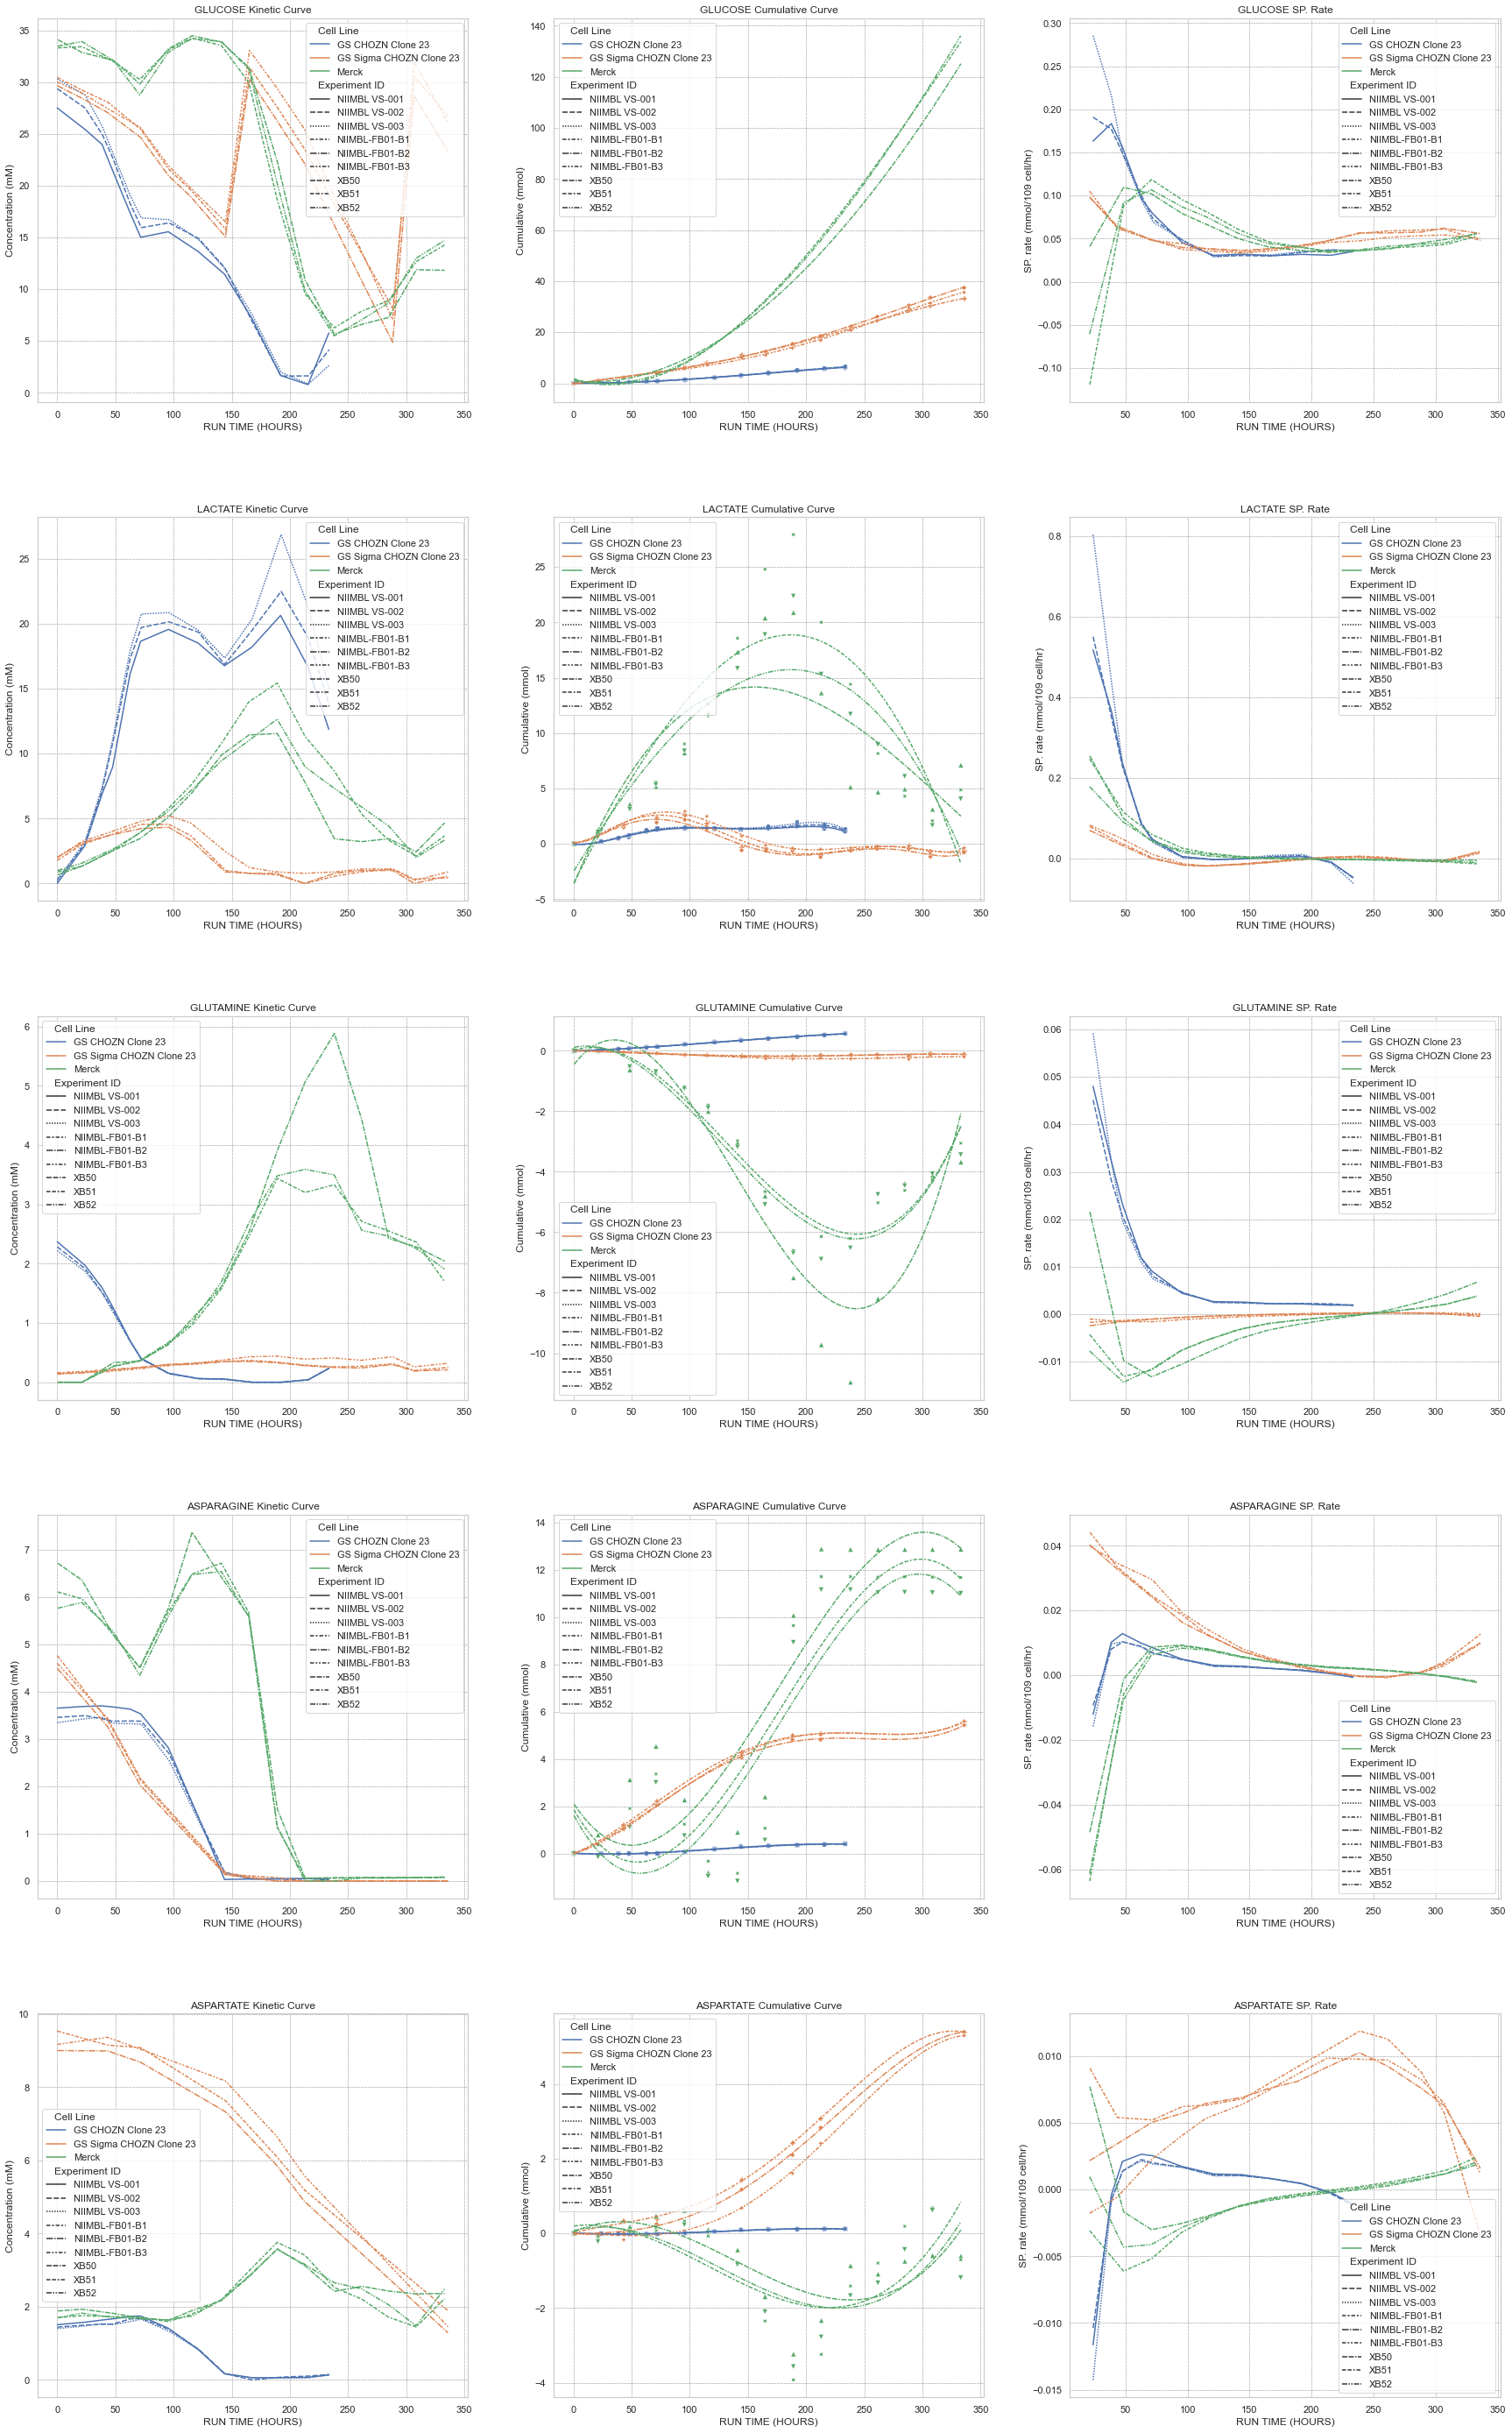

In [40]:
plot_list = ['Glucose','Lactate','Glutamine','Asparagine','Aspartate']
method = 'polyreg' # default='all', 'polyreg', 'twopt', 'rollreg' 
cell_line_list = ['Merck','GS CHOZN Clone 23']
file_name = 'polyreg'
fig = cell_line.plot_cell_lines(spc_list=plot_list,
                                compare_cell_line=True,
                                method=method,
                                #cell_line_list=cell_line_list,
                                #file_name=file_name
                                )

Compare different experiments in different cell lines

['GS CHOZN Clone 23', 'GS Sigma CHOZN Clone 23', 'Merck']


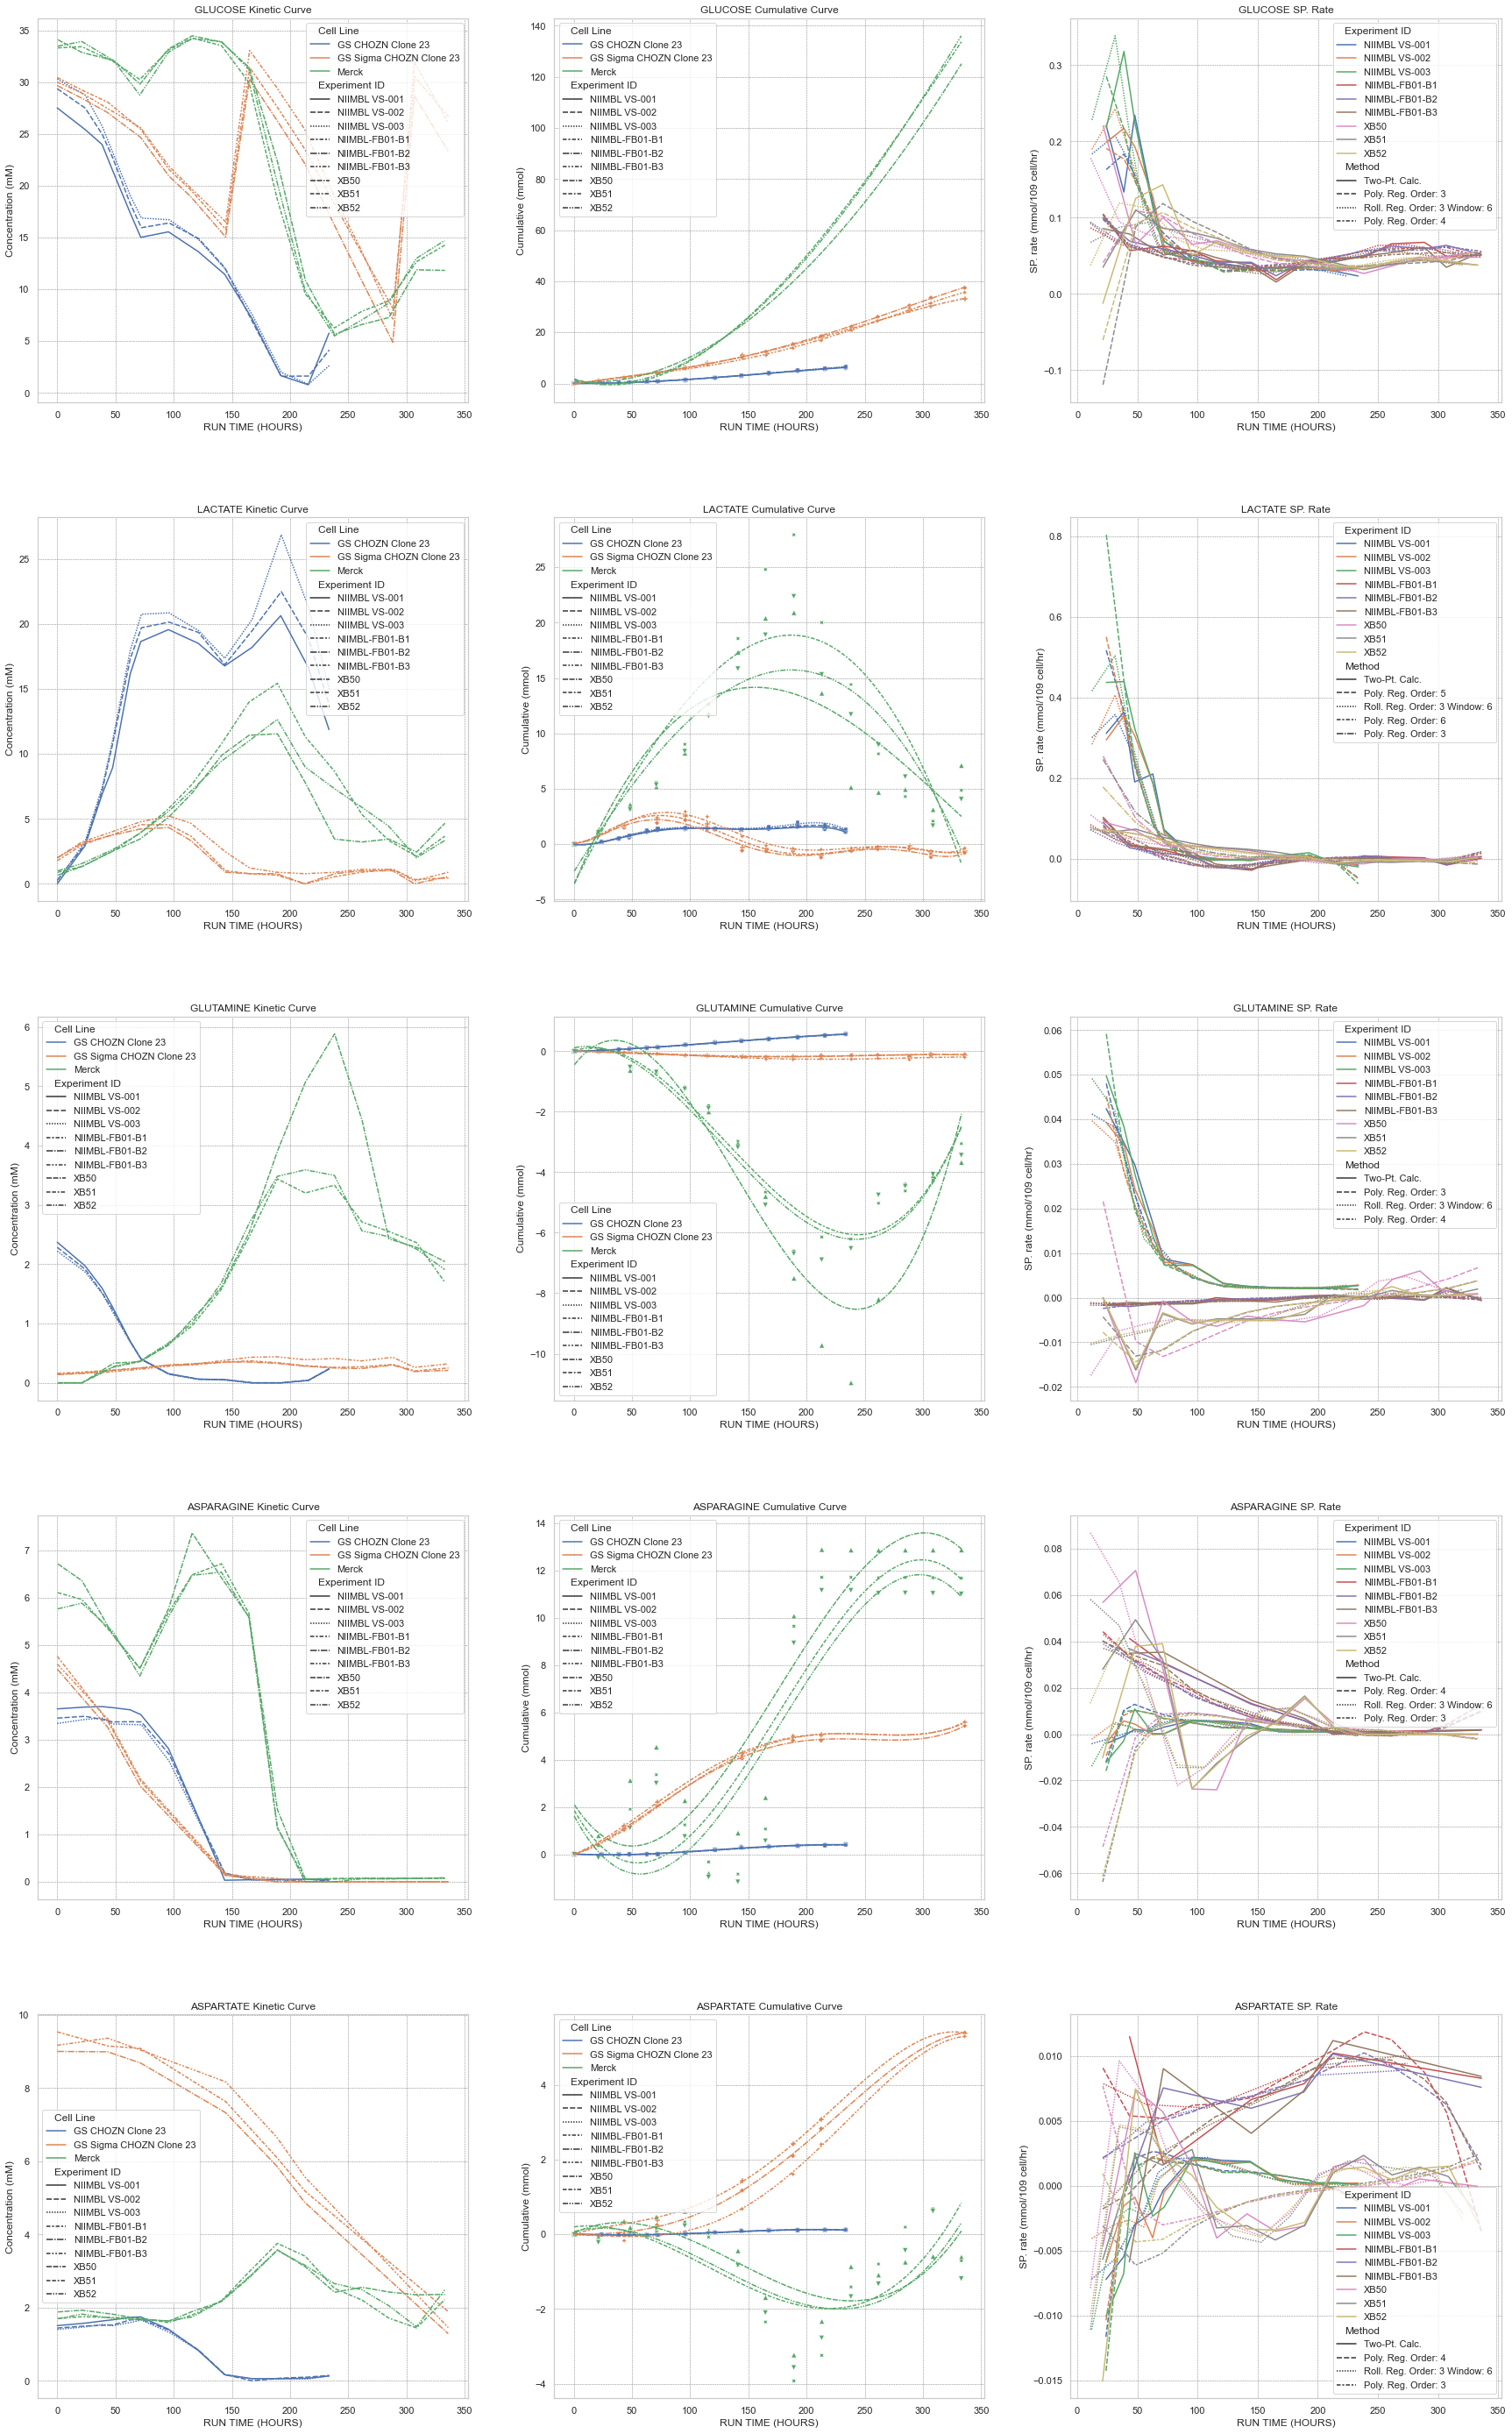

In [41]:
plot_list = ['Glucose','Lactate','Glutamine','Asparagine','Aspartate']
method = 'polyreg' # default='all', 'polyreg', 'twopt', 'rollreg' 
cell_line_list = ['Merck','GS CHOZN Clone 23']
file_name = 'polyreg'
fig = cell_line.plot_cell_lines(spc_list=plot_list,
                                compare_cell_line=False,
                                #method=method,
                                #cell_line_list=cell_line_list,
                                #file_name=file_name
                                )

## Save Bioprocess Data as an Excel

In [42]:
cell_line.get_cell_line_list()

['GS CHOZN Clone 23', 'GS Sigma CHOZN Clone 23', 'Merck']

In [43]:
cell_line.save_excel(cell_line='GS CHOZN Clone 23', file_name='cl_1')
cell_line.save_excel(cell_line='GS Sigma CHOZN Clone 23', file_name='cl_2')
cell_line.save_excel(cell_line='Merck', file_name='cl_3')

cl_1.xlsx saved
cl_2.xlsx saved
cl_3.xlsx saved


## Save Rolling Regression Data as an Excel

In [44]:
cell_line.save_excel_rollreg(cell_line='GS CHOZN Clone 23', file_name='cl_1_rollreg')
cell_line.save_excel_rollreg(cell_line='GS Sigma CHOZN Clone 23', file_name='cl_2_rollreg')
cell_line.save_excel_rollreg(cell_line='Merck', file_name='cl_3_rollreg')

cl_1_rollreg.xlsx saved
cl_2_rollreg.xlsx saved
cl_3_rollreg.xlsx saved
